# 📘 USC Master in Artificial Intelligence — 2025  

This notebook corresponds to **Assignment — P1 Part-of-Speech (PoS) tagging**  for the Natural Language Understanding course of the USC Artificial Intelligence Master 2025. 

**Course:** Natural Language Understanding 

**Authors:** 
 - Gian Paolo Bulleddu ([gianpaolo.bulleddu@rai.usc.es])
 - Francisco --- ([])
-  Santiago .. ([])

**Teachers** 
 - Alejandro Catalá  ([alejandro.catala@usc.es])
 - Mario Izquierdo ([mario.izquierdo.alvarez@usc.es])

# Imports

In [ ]:
import pickle
from NLUutils import parse_conllu_basic, build_tokenizer, build_tag_vocab, encode_sentences, encode_tags, debug_tokenizer, debug_tags
from posTaggerClass import PosTagger

In [ ]:
MAX_LEN = 128                       # max sentence lenght
TOKENIZER_PATH = './tokenizer_it.pkl'  # tokenizer saving path
TAG2IDX_PATH = './tag2idx_it.pkl'      # tag2idx saving path
IDX2TAG_PATH = './idx2tag_it.pkl'      # idx2tag saving path
OOV_TOKEN = "[UNK]"
PAD_TOKEN = "[PAD]"

train_file = "./UD_Italian-VIT-master/it_vit-ud-train.conllu"
val_file   = "./UD_Italian-VIT-master/it_vit-ud-dev.conllu"
test_file  = "./UD_Italian-VIT-master/it_vit-ud-test.conllu"

train_sents, train_tags = parse_conllu_basic(train_file)
val_sents, val_tags     = parse_conllu_basic(val_file)
test_sents, test_tags   = parse_conllu_basic(test_file)

tokenizer, VOCAB_SIZE = build_tokenizer(train_sents,oov_token=OOV_TOKEN, pad_token=PAD_TOKEN)
tag2idx, idx2tag = build_tag_vocab(train_tags)

with open(TOKENIZER_PATH, "wb") as f:
    pickle.dump(tokenizer, f)
print(f" Tokenizer saved to {TOKENIZER_PATH}")   

with open(TAG2IDX_PATH, "wb") as f:
    pickle.dump(tag2idx, f)
print(f" tag2idx saved to {TAG2IDX_PATH}")      
    
with open(IDX2TAG_PATH, "wb") as f:
    pickle.dump(idx2tag, f)
print(f" idx2tag saved to {IDX2TAG_PATH}")    
 
DEBUG = True   # set to True to print tokenizer attributes
debug_tokenizer(tokenizer, debug=DEBUG)


X_train = encode_sentences(tokenizer, train_sents, MAX_LEN)
X_val   = encode_sentences(tokenizer, val_sents, MAX_LEN)
X_test  = encode_sentences(tokenizer, test_sents, MAX_LEN)

y_train = encode_tags(train_tags, tag2idx, MAX_LEN)
y_val   = encode_tags(val_tags, tag2idx, MAX_LEN)
y_test  = encode_tags(test_tags, tag2idx, MAX_LEN)


DEBUG = True   # set to True to print tokenizer attributes
debug_tags(tag2idx, idx2tag, y_encoded=y_train, debug=DEBUG)


 Tokenizer saved to ./tokenizer_it.pkl
 tag2idx saved to ./tag2idx_it.pkl
 idx2tag saved to ./idx2tag_it.pkl
==================== TOKENIZER DEBUG INFO  ====================
Vocabulary size: 21016
OOV token: [UNK]
Number of documents: 8267
Number of words considered (num_words): None

--- Top 10 words ---
 1. Word: '[UNK]          '  ID:    2  Count:    0  OOV: Yes
 2. Word: 'di             '  ID:    3  Count: 15604  OOV: 
 3. Word: ',              '  ID:    4  Count: 10371  OOV: 
 4. Word: 'il             '  ID:    5  Count: 8890  OOV: 
 5. Word: '.              '  ID:    6  Count: 7531  OOV: 
 6. Word: 'la             '  ID:    7  Count: 7066  OOV: 
 7. Word: 'a              '  ID:    8  Count: 5682  OOV: 
 8. Word: 'e              '  ID:    9  Count: 4802  OOV: 
 9. Word: 'in             '  ID:   10  Count: 4518  OOV: 
10. Word: 'l'             '  ID:   11  Count: 4227  OOV: 

word_index (first 10): {'[UNK]': 2, 'di': 3, ',': 4, 'il': 5, '.': 6, 'la': 7, 'a': 8, 'e': 9, 'in': 10, "l'

# Buil/Train/Save Model

params {'lstm_units': 128, 'embedding_dim': 128, 'batch_size': 32, 'lstm_droput': 0.1, 'learning_rate': 0.001, 'input_dim': 21017, 'epochs': 50, 'patience': 3, 'model_path': 'pos_tag_it.keras', 'tokenizer_path': './tokenizer_it.pkl', 'tag2idx_path': './tag2idx_it.pkl', 'idx2tag_path': './idx2tag_it.pkl', 'max_len': 128, 'tag_size': 18, 'vocab_size': 21017, 'num_tags': 18, 'oov': '[UNK]'}
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128)]             0         
                                                                 
 embedding (Embedding)       (None, 128, 128)          2690176   
                                                                 
 bidirectional (Bidirectiona  (None, 128, 256)         263168    
 l)                                                              
                                                                 


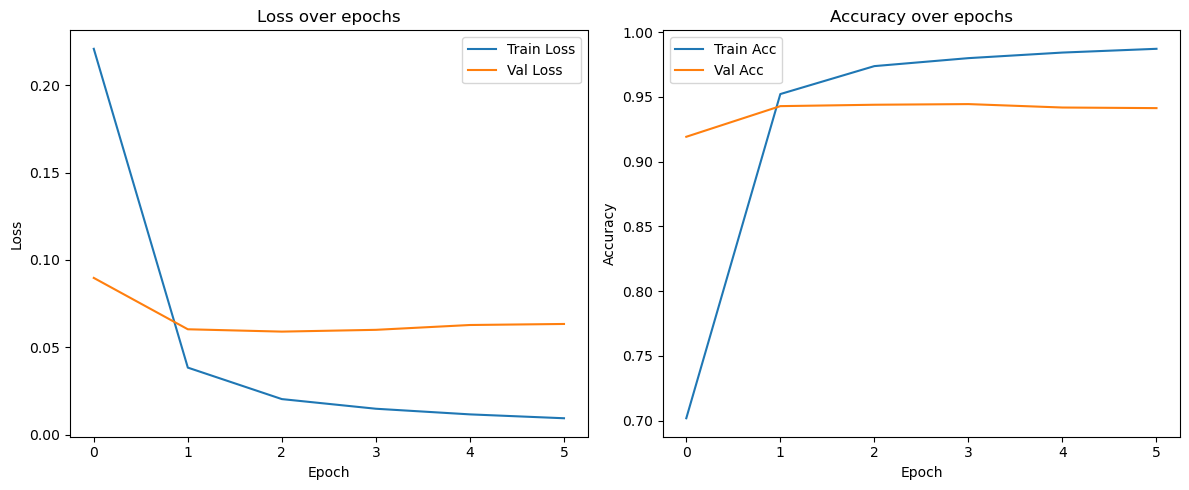

CPU times: total: 1min 41s
Wall time: 1min 14s


In [ ]:
LSTM_UNITS = 128
EMB_DIM = 128
BATCH_SIZE = 32
LSTM_DROPOUT = 0.1
LEARNING_RATE = 0.001
EPOCHS = 50
PATIENCE = 3
MAX_LEN = 128
MODEL_PATH = "pos_tag_it.keras"

params = {
    'lstm_units': LSTM_UNITS,
    'embedding_dim' :EMB_DIM , 
    'batch_size': BATCH_SIZE,  
    'lstm_droput':LSTM_DROPOUT,
    'learning_rate':LEARNING_RATE,
    'input_dim': len(tokenizer.word_index) + 1,
    'epochs':EPOCHS,
    'patience':PATIENCE,
    'model_path':MODEL_PATH, 
    'tokenizer_path':TOKENIZER_PATH,
    'tag2idx_path': TAG2IDX_PATH,
    'idx2tag_path': IDX2TAG_PATH,
    'max_len':MAX_LEN ,
    'tag_size':len(tag2idx),
    'vocab_size':VOCAB_SIZE,
    'num_tags':len(tag2idx),
    'oov':OOV_TOKEN
}

tagger = PosTagger(params)
tagger.build_model()
history = tagger.train(X_train, y_train, X_val, y_val)
tagger.save()
tagger.plot(history)


# Evaluate

In [ ]:
test_loss, test_acc = tagger.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

34/34 [==============================] - 1s 19ms/step - loss: 0.0446 - masked_accuracy: 0.9300
Test Accuracy: 0.9300
Test Loss: 0.0446
Test Accuracy: 0.9300
Test Loss: 0.0446
CPU times: total: 828 ms
Wall time: 705 ms


# Test Prediction

In [ ]:
tagger.load()

In [ ]:
sentence_to_tag = "ciao sono qui per imparar a programmare modelli di intelligenza artificale"
tagger.predict_sentence(sentence_to_tag)

load : Model loaded from pos_tag_it.keras
load : tokenizer loaded from ./tokenizer_it.pkl
load :idx2tag loaded from ./idx2tag_it.pkl
1/1 [==============================] - 2s 2s/step

Predicted POS tags:
----------------------------------------
ciao             UNK         (conf: 0.00)
sono             AUX         (conf: 0.98)
qui              ADV         (conf: 0.99)
per              ADP         (conf: 1.00)
imparar          UNK         (conf: 0.00)
a                ADP         (conf: 1.00)
programmare      UNK         (conf: 0.00)
modelli          NOUN        (conf: 0.99)
di               ADP         (conf: 1.00)
intelligenza     NOUN        (conf: 0.95)
artificale       UNK         (conf: 0.00)
----------------------------------------


In [ ]:
sentence = input()
tagger.predict_sentence(sentence)